# NLTK

Chapter 3 exercises 9, 43

In [1]:
# import packages for assignment
import nltk, re, pprint, unicodedata
from urllib import request
from nltk import word_tokenize
from nltk.book import *
from nltk.metrics.spearman import *
from nltk.corpus import udhr 

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## 9.

In [2]:
# save some text into file corpus.txt
with open('corpus.txt', 'w') as output_txt:
    output_txt.write('In this book we view a text as a list of words. A "raw '\
                     'text" is a potentially long string containing words and '\
                     'whitespace formatting, and is how we typically store and '\
                     'visualize a text... (from https://www.nltk.org/book/ch03.html)')
    output_txt.write('Jack Johnson and Amy Adams-Smith purchased $5,000 of stocks '\
                     'from various companies like Apple, Dell, Google, HP, and '\
                     'Samsung several months ago on 4/12/18. Since then they have '\
                     'lost a total of $298.12 on their investments.')

In [3]:
# function that reads from file f, and returns 
# a string containing the text of the file
def load(f):
    with open(f, 'r') as input_txt:
        return input_txt.read()

In [4]:
# read in text
text = load('corpus.txt')

### a.

In [5]:
# use nltk.regexp_tokenize() to create tokenizer that tokenizes 
# various kinds of punctuation in text, with one multi-line 
# regular expression, with inline comments, using verbose flag (?x)
pattern = r'''(?x)    # set flag to allow verbose regexps
        \.\.\.        # ellipsis
      | [.?!]         # terminal points
      | [,;:]         # pausing points
      | [-—]          # dashes
      | [][(){}'"<>]  # wrappers
      | [/]           # others
    '''
nltk.regexp_tokenize(text, pattern)

['.',
 '"',
 '"',
 ',',
 '...',
 '(',
 ':',
 '/',
 '/',
 '.',
 '.',
 '/',
 '/',
 '.',
 ')',
 '-',
 ',',
 ',',
 ',',
 ',',
 ',',
 '/',
 '/',
 '.',
 '.',
 '.']

### b.

In [6]:
# use nltk.regexp_tokenize() to create a tokenizer that tokenizes
# the following kinds of expression: 
# monetary amounts; dates; names of people and organizations
pattern = r'''(?x)                   # set flag to allow verbose regexps
        \$\d+(?:[,\.]\d+)?           # monetary amounts
      | \d+[-/]\d+[-/]\d+            # dates
      | [A-Z]+\w+(?:[-\ ][A-Z]+\w+)* # names (includes capitalized words)
    '''
nltk.regexp_tokenize(text, pattern)

['In',
 'Jack Johnson',
 'Amy Adams-Smith',
 '$5,000',
 'Apple',
 'Dell',
 'Google',
 'HP',
 'Samsung',
 '4/12/18',
 'Since',
 '$298.12']

### 43.

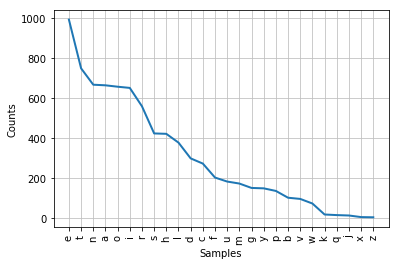

In [7]:
# sample English text
raw_en = udhr.raw('English-Latin1')

# remove any accents
raw_en = unicodedata.normalize('NFKD', raw_en)
raw_en = raw_en.encode('ASCII', 'ignore').decode('utf-8-sig')

# tokenize and separate out characters
text_en = nltk.Text(word_tokenize(raw_en))
text_en = [ch.lower() for ch in ''.join(text_en) if ch.isalpha()]

# build and plot frequency distribution of letters
fdist_en = FreqDist(text_en)
fdist_en.plot()

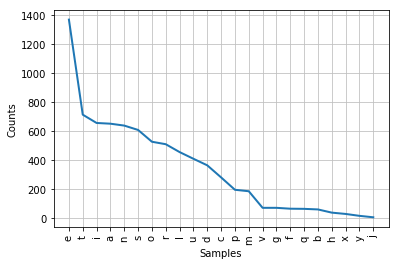

In [8]:
# sample French text
raw_fr = udhr.raw('French_Francais-Latin1')

# remove any accents
raw_fr = unicodedata.normalize('NFKD', raw_fr)
raw_fr = raw_fr.encode('ASCII', 'ignore').decode('utf-8-sig')

# tokenize and separate out characters
text_fr = nltk.Text(word_tokenize(raw_fr))
text_fr = [ch.lower() for ch in ''.join(text_fr) if ch.isalpha()]

# build and plot frequency distribution of letters
fdist_fr = FreqDist(text_fr)
fdist_fr.plot()

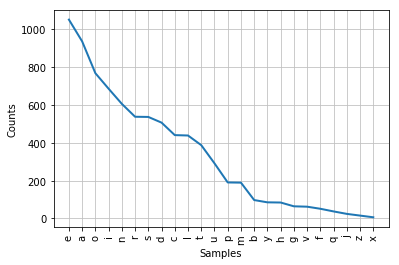

In [9]:
# sample Spanish text
raw_sp = udhr.raw('Spanish_Espanol-Latin1')

# remove any accents
raw_sp = unicodedata.normalize('NFKD', raw_sp)
raw_sp = raw_sp.encode('ASCII', 'ignore').decode('utf-8-sig')

# tokenize and separate out characters
text_sp = nltk.Text(word_tokenize(raw_sp))
text_sp = [ch.lower() for ch in ''.join(text_sp) if ch.isalpha()]

# build and plot frequency distribution of letters
fdist_sp = FreqDist(text_sp)
fdist_sp.plot()

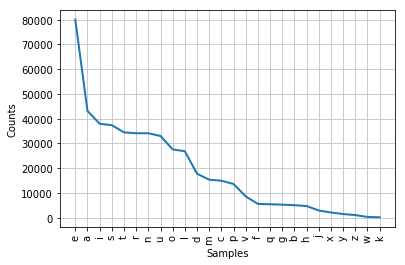

In [10]:
# The Project Gutenberg EBook of Maurin des Maures, by Jean Aicard
# 'unknown' text - French
url = 'http://www.gutenberg.org/files/56393/56393-0.txt'
response = request.urlopen(url)
raw_x = response.read().decode('utf-8-sig')

# remove any accents
raw_x = unicodedata.normalize('NFKD', raw_x)
raw_x = raw_x.encode('ASCII', 'ignore').decode('utf-8-sig')

# tokenize and separate out characters
text_x = nltk.Text(word_tokenize(raw_x))
text_x = [ch.lower() for ch in ''.join(text_x) if ch.isalpha()]

# build and plot frequency distribution of letters
fdist_x = FreqDist(text_x)
fdist_x.plot()

In [11]:
# extract letter list of decreasing freqency
en,_ = zip(*fdist_en.most_common())
fr,_ = zip(*fdist_fr.most_common())
sp,_ = zip(*fdist_sp.most_common())
x,_ = zip(*fdist_x.most_common())

# apply Spearman correlation coefficent to ranked lists
print('%0.1f' % spearman_correlation(ranks_from_sequence(x), 
                                     ranks_from_sequence(en)))
print('%0.1f' % spearman_correlation(ranks_from_sequence(x), 
                                     ranks_from_sequence(fr)))
print('%0.1f' % spearman_correlation(ranks_from_sequence(x), 
                                     ranks_from_sequence(sp)))

0.9
1.0
0.9


The results above indicate that there's a stronger correlation between the unknown text with the French text than with the English or Spanish texts. Therefore, this method correctly identifies the language of the unknown text.